<a href="https://colab.research.google.com/github/pquynhvu/TDA/blob/main/mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import Constant
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau
keras.layers.Layer.weights
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
class_labels = list(set(y_train))
# add color channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
# normalize
x_train, x_test = x_train/255.0, x_test/255.0
# one-hot encoding
label_train, label_test = to_categorical(y_train), to_categorical(y_test)

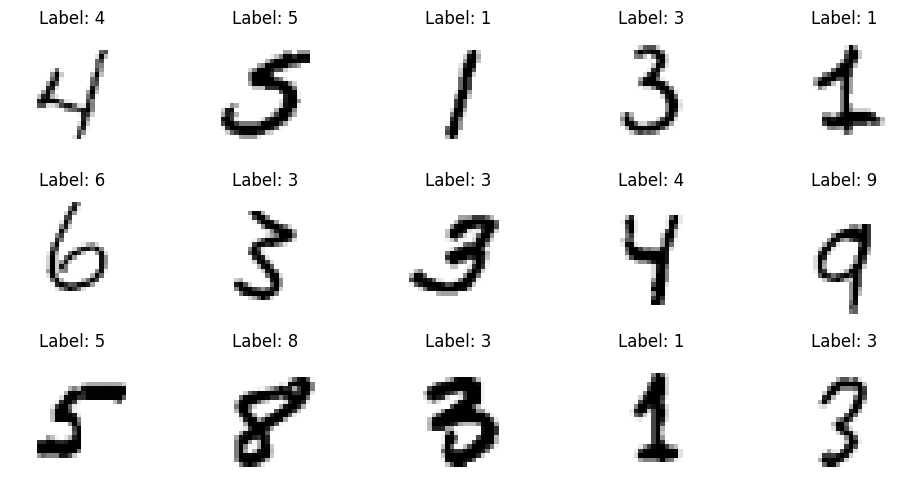

In [4]:
num_row, num_col = 3, 5

idx_10 = np.random.randint(low=0, high=x_train.shape[0], size=(num_row*num_col,))
x_train_10, y_train_10 = x_train[idx_10], y_train[idx_10]

# visualize
fig, axs = plt.subplots(num_row, num_col, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label: {}'.format(y_train_10[i])))
    ax.imshow(x_train_10[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [17]:
num_filter_1st = 1
num_filter_2nd = 1
iter = 1000

mnist_cnn = models.Sequential() # initialize model
mnist_cnn.add(Conv2D(filters = num_filter_1st,
                     kernel_size = (3,3),
                     padding = 'same',
                     strides=1,
                     bias_initializer=Constant(0.2),
                     activation="relu",
                     input_shape = (28,28,1)))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))
mnist_cnn.add(Conv2D(filters = num_filter_2nd,
                     kernel_size = (2,2),
                     padding = 'Same',
                     strides=1,
                     bias_initializer=Constant(0.2),
                     activation ='relu'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) # strides = (1,1)
mnist_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 1)           │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 27, 27, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 1)           │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
mnist_cnn_fit = mnist_cnn.fit(x_train, label_train, epochs = 5, batch_size = 250)

Epoch 1/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.1136 - loss: 2.2816
Epoch 2/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.3750 - loss: 1.9619
Epoch 3/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 96ms/step - accuracy: 0.5785 - loss: 1.3135
Epoch 4/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.7447 - loss: 0.8164
Epoch 5/5
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.8079 - loss: 0.6158


In [26]:
for layer in mnist_cnn.layers:
    if isinstance(layer, Conv2D):
        weights = layer.get_weights()  # This returns a list: [weights, biases]
        print(f"Layer: {layer.name}")
        print(f"Weights (shape): {weights[0].shape}")  # shape of the filters (kernels)
        print(f"Biases (shape): {weights[1].shape}\n")  # shape of the biases

Layer: conv2d_2
Weights (shape): (3, 3, 1, 1)
Biases (shape): (1,)

Layer: conv2d_3
Weights (shape): (2, 2, 1, 1)
Biases (shape): (1,)



In [27]:
weights[0]

IndexError: list index out of range

In [52]:
def plot_images(data, labels, nrows=0, images_per_row=0):
    fig, axes = plt.subplots(nrows, images_per_row, figsize=(10, 10))
    axes = axes.ravel()

    for i in range(nrows):
      for j in range(images_per_row):
        ax = axes[i*images_per_row + j]
        ax.set_title(('Label {}'.format(labels[i])))
        ax.imshow(data[i, :, :, j], cmap=matplotlib.cm.binary)
        #ax.set_title(f"Image {j+1}, Channel {i+1}")
        ax.axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

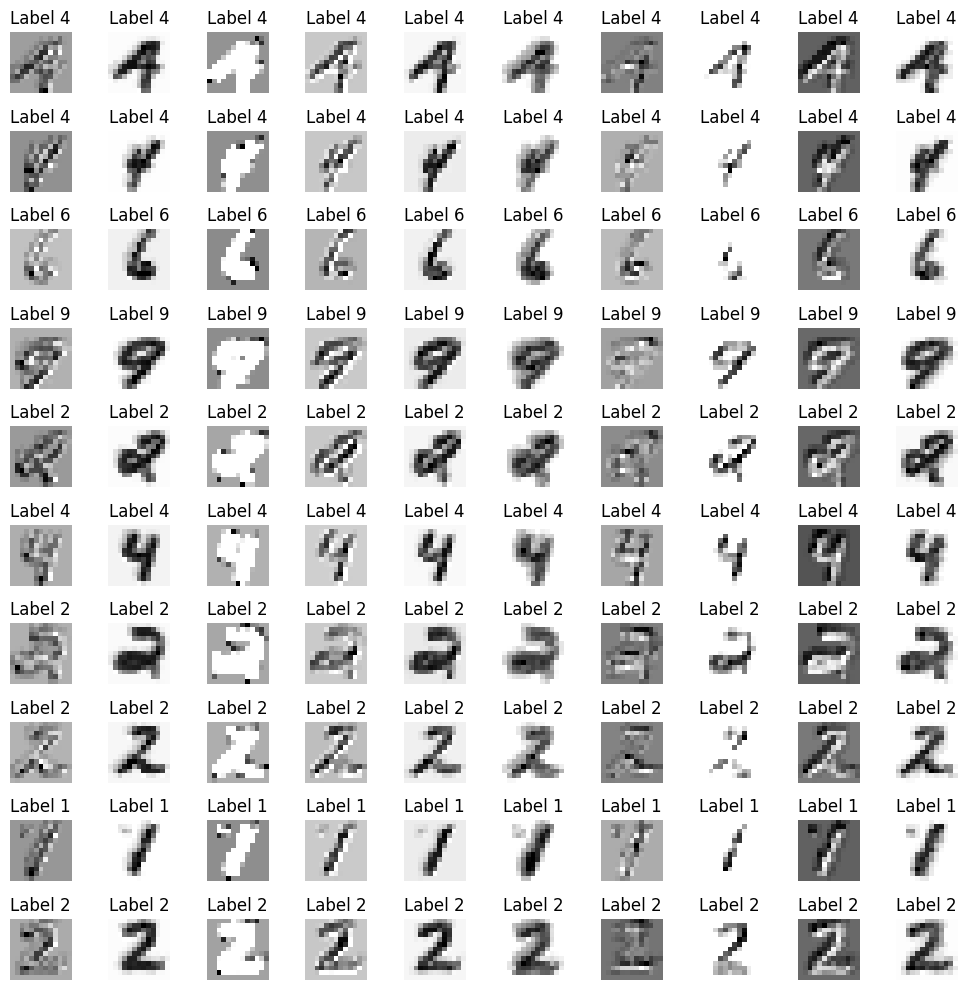

In [53]:
idx = np.random.randint(low=0, high=x_cnn.shape[0], size=(10,))
x_cnn_sampled = x_cnn[idx,:,:,:]
y_train_sampled = y_train[idx]
plot_images(x_cnn_sampled, y_train_sampled, x_cnn_sampled.shape[0], 10)

In [54]:
!pip install gudhi
import gudhi as gd

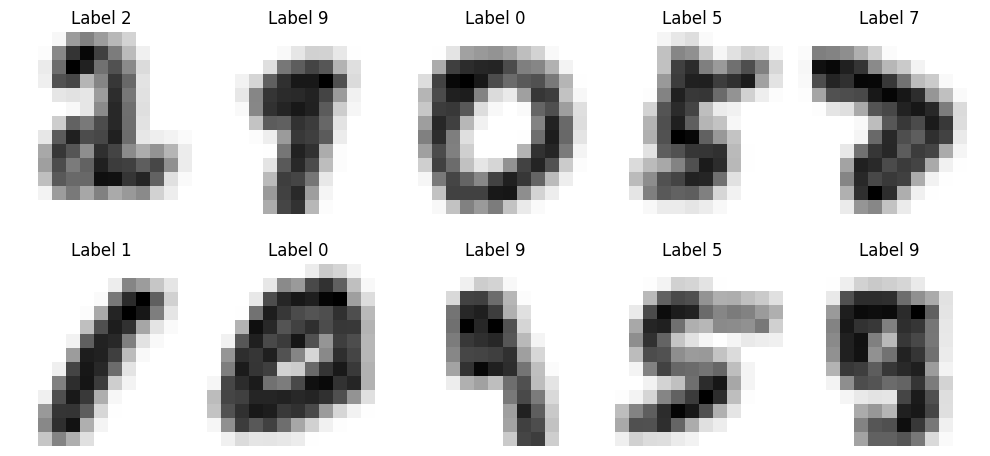

In [ ]:
x_cnn_avg = np.mean(x_cnn, axis=3)
x_cnn_sampled_avg = x_cnn_avg[idx,:,:]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flatten()):
    ax.set_title(('Label {}'.format(y_train_sampled[i])))
    ax.imshow(x_cnn_sampled_avg[i], cmap=matplotlib.cm.binary)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [76]:
idx_barcode = np.random.randint(low=0, high=x_cnn.shape[0], size=(200,))
x_cnn_sampled_avg_barcode = x_cnn_avg[idx_barcode,:,:]
n_classes = x_cnn_sampled_avg_barcode.shape[0]
barcode_data = []

for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg_barcode[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

In [86]:
barcode_data = pd.DataFrame(barcode_data, columns=['birth', 'death'])
barcode_data['class'] = y_train[idx_barcode]
barcode_data[:20]

,birth,death,class
0,"(3, (0.011464075929989255, 0.011475482844704062))","(2, (0.01114572830919473, 0.011394508063804848))",6
1,"(2, (0.009157203985730868, 0.009205741067291513))","(2, (0.009203944231267108, 0.009208147354561195))",7
2,"(3, (0.01141065105805647, 0.011429932752470623))","(3, (0.01142051320505769, 0.011422965768149964))",2
3,"(3, (0.008170684617292034, 0.008173638032401457))","(2, (0.007801146154495756, 0.00788270674512919))",5
4,"(2, (0.003107906625155563, 0.00315289890580223...","(2, (0.005220317373936944, 0.005259685668031001))",3
5,"(2, (0.0032117363602491766, 0.0032229253999395...","(2, (0.0073494497673779816, 0.0073569397389718...",2
6,"(2, (0.0014314479546095225, 0.0014320218426103...","(1, (0.0049915060648267895, 0.0075880274916638...",1
7,"(3, (0.01011362499839703, 0.01012573606307873))","(2, (0.011552914957081597, 0.011895243107668988))",0
8,"(2, (0.0024923589931649818, 0.0025004854811525...","(1, (0.003451588896849045, 0.008785080342001463))",6
9,"(2, (0.005212452598171949, 0.00546600299360781))","(2, (0.013402244909770572, 0.013405060344732551))",3


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


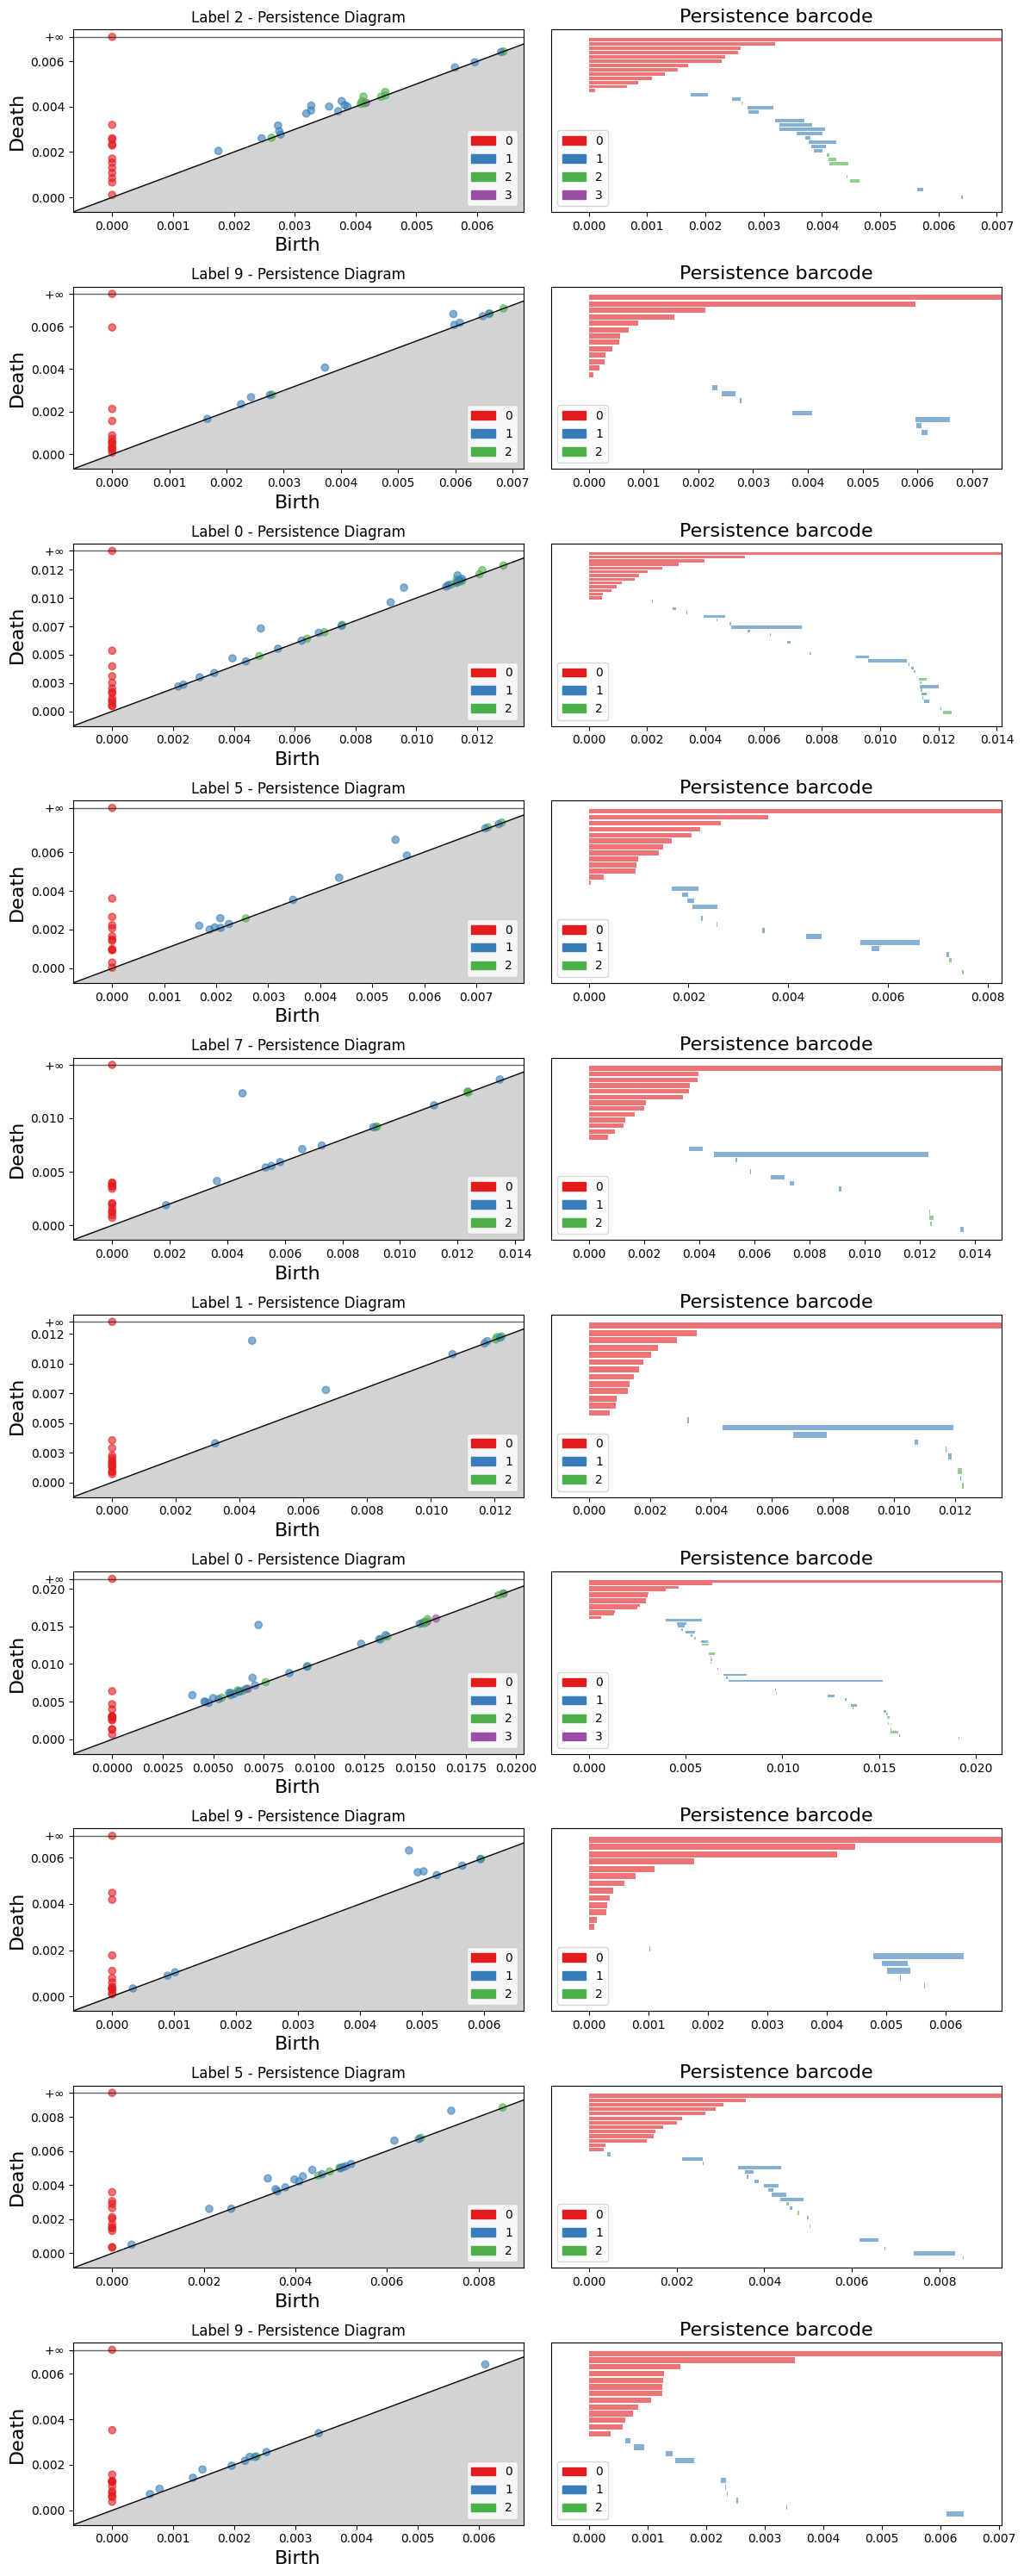

In [ ]:
n_classes = x_cnn_sampled_avg.shape[0]
barcode_data = []

fig, ax = plt.subplots(n_classes, 2, figsize=(12, 3 * n_classes))  # 2 columns for diagrams and barcodes
for i in range(n_classes):
    alpha_complex = gd.AlphaComplex(points=x_cnn_sampled_avg[i]) # create an AlphaComplex object for class i
    simplex_tree = alpha_complex.create_simplex_tree() # create a simplex tree from the AlphaComplex
    pers = simplex_tree.persistence() # compute the persistent homology
    # plotting
    gd.plot_persistence_diagram(pers, axes=ax[i, 0])
    ax[i, 0].set_title('Label {} - Persistence Diagram'.format(y_train_sampled[i]))
    gd.plot_persistence_barcode(pers, axes=ax[i, 1])

    birth, death = pers[0], pers[1]
    barcode_data.append([birth, death])

plt.tight_layout()
plt.show()

In [ ]:
mnist_cnn.add(Flatten())
#mnist_cnn.add(Dense(256, activation = "relu"))
mnist_cnn.add(Dense(10, activation = "softmax"))
mnist_cnn.compile(optimizer = "sgd", loss = "categorical_crossentropy", metrics=["accuracy"])
y_pred = mnist_cnn.fit(x_train, label_train, epochs = 30, batch_size = 250, validation_data=(x_test, label_test))

Epoch 1/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.3788 - loss: 2.2207 - val_accuracy: 0.9748 - val_loss: 1.9552
Epoch 2/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.9844 - loss: 1.8601 - val_accuracy: 0.9751 - val_loss: 1.5789
Epoch 3/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.9845 - loss: 1.4681 - val_accuracy: 0.9752 - val_loss: 1.1713
Epoch 4/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - accuracy: 0.9835 - loss: 1.0617 - val_accuracy: 0.9742 - val_loss: 0.8064
Epoch 5/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 37s 154ms/step - accuracy: 0.9831 - loss: 0.7149 - val_accuracy: 0.9722 - val_loss: 0.5500
Epoch 6/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9816 - loss: 0.4817 - val_accuracy: 0.9700 - val_loss: 0.4040
Epoch 7/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.9797 - loss: 0.3497 - val_accuracy: 0.9724 - val_loss: 0.3084
Epoch 8/30
240/240 ━━━━━━━━━━━━━━━━━━━━ 38s 157ms/step - accuracy: 0.9772 - loss: 0

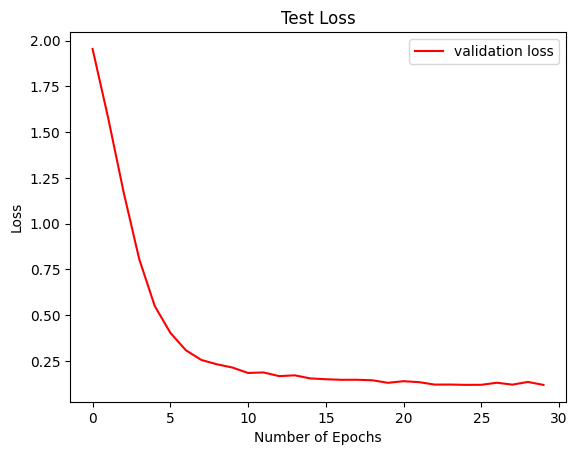

In [ ]:
plt.plot(y_pred.history['val_loss'], color='r', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


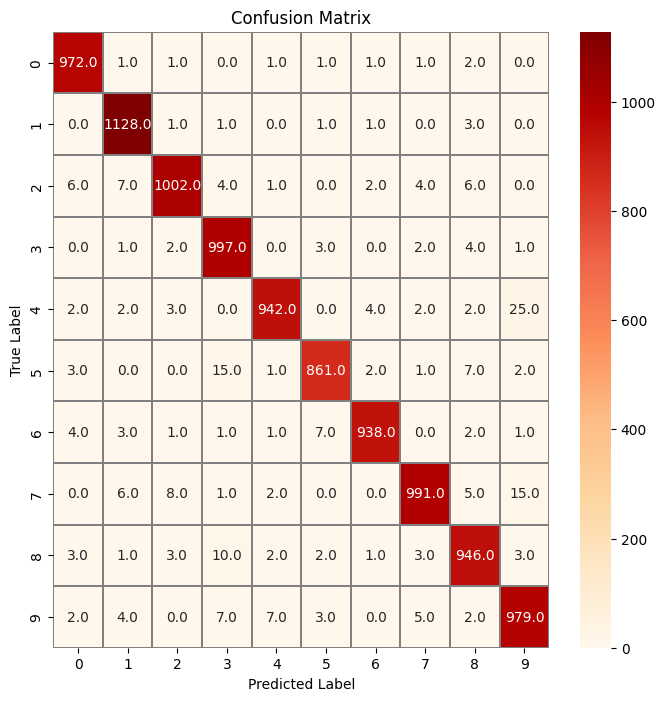

In [ ]:
Y_pred = mnist_cnn.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(label_test,axis = 1)
cm = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="OrRd",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
!pip install nibabel
import nibabel